## Transfer Learning MobileNet - Cats and Dogs





In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from matplotlib import style
from tensorflow.keras import layers

In [0]:
import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image
import pandas as pd
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [0]:
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

style.use('ggplot')

### Part 1 : Use TensorFlow Hub MobileNet for Prediction

#### Download the Classifier

In [0]:
CLASSIFIER_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
IMAGE_RES = 224

model = tf.keras.Sequential([
  hub.KerasLayer(handle=CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))
])

#### Run it on a Single Image

In [7]:
IMG_URL = 'https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg'

grace_hopper = tf.keras.utils.get_file(fname='image.jpg', origin=IMG_URL)
print(grace_hopper)

65536/61306 [================================] - 0s 0us/step
/root/.keras/datasets/image.jpg


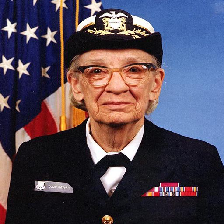

In [8]:
grace_hopper = Image.open(grace_hopper).resize((IMAGE_RES, IMAGE_RES))
grace_hopper

In [9]:
print(grace_hopper)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F2E7B5E3CC0>


In [10]:
grace_hopper = np.array(grace_hopper)
print(grace_hopper)
print(grace_hopper.shape)

[[[ 25  28  83]
  [ 30  32  93]
  [ 33  34 101]
  ...
  [ 73 111 186]
  [ 66 104 179]
  [ 56  94 169]]

 [[ 25  28  83]
  [ 24  26  87]
  [ 23  24  89]
  ...
  [ 78 114 188]
  [ 81 117 191]
  [ 86 122 196]]

 [[ 21  24  79]
  [ 23  25  86]
  [ 29  30  95]
  ...
  [ 92 129 200]
  [ 81 118 189]
  [ 83 120 191]]

 ...

 [[162  10  23]
  [165  18  28]
  [152  22  24]
  ...
  [  9   8  14]
  [ 11  10  16]
  [ 11  10  16]]

 [[162  14  28]
  [152   8  17]
  [146  20  21]
  ...
  [ 14  13  19]
  [ 17  16  22]
  [ 14  13  19]]

 [[156  14  26]
  [153  16  23]
  [142  22  21]
  ...
  [ 11  10  16]
  [ 13  12  18]
  [ 13  12  18]]]
(224, 224, 3)


In [11]:
grace_hopper = grace_hopper/255
print(grace_hopper)
print(grace_hopper.shape)

[[[0.09803922 0.10980392 0.3254902 ]
  [0.11764706 0.1254902  0.36470588]
  [0.12941176 0.13333333 0.39607843]
  ...
  [0.28627451 0.43529412 0.72941176]
  [0.25882353 0.40784314 0.70196078]
  [0.21960784 0.36862745 0.6627451 ]]

 [[0.09803922 0.10980392 0.3254902 ]
  [0.09411765 0.10196078 0.34117647]
  [0.09019608 0.09411765 0.34901961]
  ...
  [0.30588235 0.44705882 0.7372549 ]
  [0.31764706 0.45882353 0.74901961]
  [0.3372549  0.47843137 0.76862745]]

 [[0.08235294 0.09411765 0.30980392]
  [0.09019608 0.09803922 0.3372549 ]
  [0.11372549 0.11764706 0.37254902]
  ...
  [0.36078431 0.50588235 0.78431373]
  [0.31764706 0.4627451  0.74117647]
  [0.3254902  0.47058824 0.74901961]]

 ...

 [[0.63529412 0.03921569 0.09019608]
  [0.64705882 0.07058824 0.10980392]
  [0.59607843 0.08627451 0.09411765]
  ...
  [0.03529412 0.03137255 0.05490196]
  [0.04313725 0.03921569 0.0627451 ]
  [0.04313725 0.03921569 0.0627451 ]]

 [[0.63529412 0.05490196 0.10980392]
  [0.59607843 0.03137255 0.06666667]


In [12]:
print(np.array([grace_hopper]).shape)

result = model.predict(np.array([grace_hopper]))
print(result)
print(result.shape)

(1, 224, 224, 3)
[[ 0.17920303  1.2696182  -0.3149821  ...  0.6060541  -0.4299778
   0.11200593]]
(1, 1001)


In [13]:
predicted_class = np.argmax(result[0])
predicted_class

653

#### Decode the Prediction

16384/10484 [==============================================] - 0s 0us/step

['background' 'tench' 'goldfish' ... 'bolete' 'ear' 'toilet tissue']



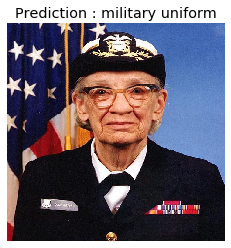

In [14]:
image_net_labels_url = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt"
image_net_labels_file = tf.keras.utils.get_file(fname='ImageNetLabels.txt', origin=image_net_labels_url)
image_net_labels = np.array(open(image_net_labels_file).read().splitlines())
print("\n{}\n".format(image_net_labels))

plt.imshow(grace_hopper)
plt.title("Prediction : {}".format(image_net_labels[predicted_class]))
plt.axis('off')
plt.grid(False)
plt.show()

### Part 2 : Use TensorFlow Hub models for the Cats vs. Dogs Dataset

In [15]:
### 80% : Training and 20% : Testing
splits = tfds.Split.ALL.subsplit(weighted=(80, 20))
print(splits)

(NamedSplitAll()(tfds.percent[0:80]), NamedSplitAll()(tfds.percent[80:100]))


In [16]:
splits = tfds.Split.ALL.subsplit(weighted=(80, 20))
splits, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True, split=splits)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/2.0.1. Subsequent calls will reuse this data.


In [17]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=2.0.1,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    urls=['https://www.microsoft.com/en-us/download/details.aspx?id=54765'],
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    year

In [0]:
training_examples, validation_examples = splits

In [19]:
training_examples

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [20]:
validation_examples

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [21]:
num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

print(num_examples)
print(num_classes)

23262
2


In [22]:
for i, example_img in enumerate(training_examples.take(3)):
  print("{} : Image_{}_Shape : {}".format(i+1, i, example_img[0].shape))

1 : Image_0_Shape : (500, 343, 3)
2 : Image_1_Shape : (375, 500, 3)
3 : Image_2_Shape : (375, 500, 3)


In [0]:
def format_images(image, label):
  image = tf.image.resize(images=image, size=(IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

training_batches = training_examples.shuffle(num_examples//4).map(format_images).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_images).batch(BATCH_SIZE).prefetch(1)

#### Run the Classifier on a batch of Images

In [24]:
image_batch, label_batch = next(iter(training_batches.take(1)))
print(image_batch)
print(label_batch)

image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

result_batch = model.predict(image_batch)

tf.Tensor(
[[[[0.45784095 0.36958706 0.23404674]
   [0.45542717 0.37174478 0.23637299]
   [0.44862568 0.37348017 0.23792236]
   ...
   [0.6715861  0.5457775  0.34168184]
   [0.6597184  0.53064585 0.3387684 ]
   [0.6408341  0.5219899  0.3359999 ]]

  [[0.4655725  0.37848827 0.24210982]
   [0.4718947  0.37788537 0.23920037]
   [0.46247262 0.37912288 0.24666274]
   ...
   [0.66954654 0.5485053  0.35090277]
   [0.66252404 0.5390743  0.3327767 ]
   [0.6545694  0.5268941  0.32994363]]

  [[0.4714001  0.38229933 0.25399816]
   [0.46888348 0.385618   0.26657474]
   [0.48489803 0.39041382 0.26668966]
   ...
   [0.674315   0.5482668  0.34634197]
   [0.6570815  0.539243   0.3389222 ]
   [0.6514914  0.525557   0.3298407 ]]

  ...

  [[0.7444787  0.5787903  0.2210467 ]
   [0.76202404 0.5942905  0.25177258]
   [0.76711637 0.6088771  0.26630998]
   ...
   [0.21769902 0.16943985 0.09487665]
   [0.22089936 0.19950594 0.15075193]
   [0.08526131 0.06579459 0.02636767]]

  [[0.75075495 0.57621235 0.236246

In [25]:
print(result_batch.shape)
result_batch

(32, 1001)


array([[ 0.02928558, -0.29599363,  0.02760215, ..., -0.60732913,
         0.82296324,  1.7757883 ],
       [ 0.26785645,  0.98083794,  1.6726984 , ..., -0.43825576,
         0.9268426 ,  0.5950619 ],
       [ 0.2858496 , -0.847536  , -0.37574577, ..., -0.28316095,
        -1.5814613 ,  0.33539754],
       ...,
       [ 0.26492736,  0.76995224,  2.07133   , ..., -0.6508293 ,
        -1.292291  ,  0.8536358 ],
       [ 0.08869109,  0.46397203,  0.7597664 , ..., -0.6308097 ,
         0.8186685 ,  0.13355438],
       [ 0.22872993,  0.50914526, -0.0848788 , ..., -0.19119474,
         0.01822485,  0.31859958]], dtype=float32)

In [26]:
predicted_class_names = image_net_labels[np.argmax(result_batch, axis=-1)]
print(len(predicted_class_names))
print(predicted_class_names)

32
['Egyptian cat' 'Egyptian cat' 'Newfoundland' 'German shepherd' 'tabby'
 'Samoyed' 'photocopier' 'kelpie' 'Rhodesian ridgeback' 'malamute'
 'Scottish deerhound' 'Labrador retriever' 'Dandie Dinmont'
 'Italian greyhound' 'Walker hound' 'golden retriever'
 'flat-coated retriever' 'Border terrier' 'schipperke' 'Border collie'
 'toy terrier' 'beagle' 'Egyptian cat' 'tabby' 'Maltese dog' 'Lhasa'
 'tabby' 'Persian cat' 'schipperke' 'golden retriever' 'tabby' 'kelpie']


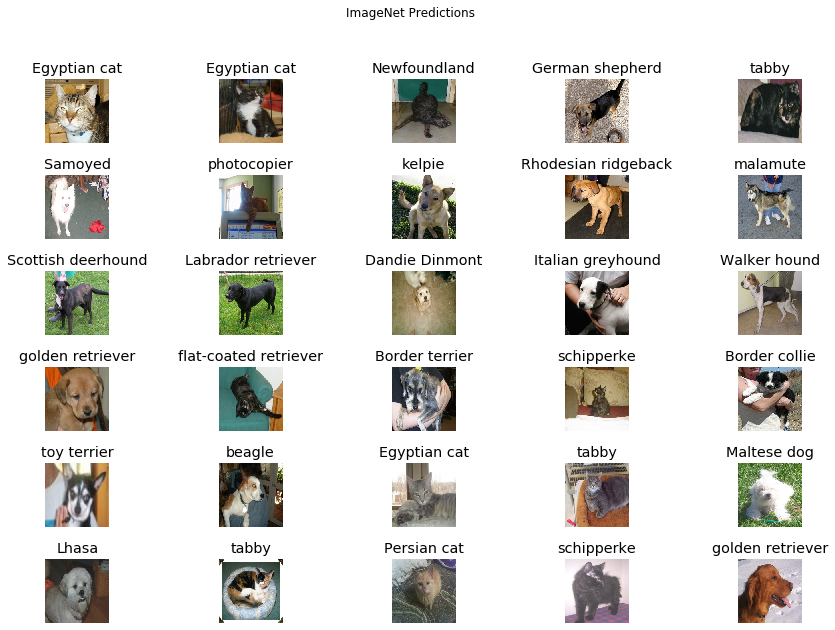

In [27]:
plt.figure(figsize=(15, 10))
plt.suptitle("ImageNet Predictions")

for n in range(30):
  plt.subplot(6, 5, n+1)
  plt.subplots_adjust(hspace=0.5)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
  plt.grid(False)

plt.show()

### Part 3 : Do Simple Transfer Learning with TensorFlow Hub

In [0]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

feature_extractor = hub.KerasLayer(handle=URL, 
                                   input_shape=(IMAGE_RES, IMAGE_RES, 3))

In [29]:
feature_batch = feature_extractor(image_batch)
print(feature_batch)

tf.Tensor(
[[0.0077241  0.3065068  0.15946774 ... 0.26142958 0.         1.3399624 ]
 [0.5507017  0.7556022  0.00998769 ... 0.00510407 0.9462965  0.32433283]
 [0.         0.3043586  0.25406945 ... 0.         0.         0.01401991]
 ...
 [0.         1.0560433  1.1255066  ... 0.         0.22384267 0.        ]
 [0.02236025 1.5455776  0.1163941  ... 0.334581   0.03506957 0.31953365]
 [0.         0.00622822 0.         ... 0.08775577 1.5110743  1.1072476 ]], shape=(32, 1280), dtype=float32)


#### Freeze the Variables of MobileNet

In [0]:
feature_extractor.trainable = False

#### Attach a Model

In [0]:
model_1 = tf.keras.Sequential([
  feature_extractor, 
  layers.Dense(units=2, activation=tf.nn.softmax)
])

#### Compile the Model

In [0]:
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [33]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


#### Fit the Model

In [34]:
EPOCHS = 6

history = model_1.fit(training_batches, 
                      epochs=EPOCHS, 
                      validation_data=validation_batches)

Epoch 1/6
582/582 [==============================] - 53s 91ms/step - loss: 0.0560 - accuracy: 0.9795 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/6
582/582 [==============================] - 48s 82ms/step - loss: 0.0286 - accuracy: 0.9894 - val_loss: 0.0306 - val_accuracy: 0.9881
Epoch 3/6
582/582 [==============================] - 50s 86ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.0303 - val_accuracy: 0.9879
Epoch 4/6
582/582 [==============================] - 49s 85ms/step - loss: 0.0199 - accuracy: 0.9925 - val_loss: 0.0337 - val_accuracy: 0.9869
Epoch 5/6
582/582 [==============================] - 49s 84ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0317 - val_accuracy: 0.9877
Epoch 6/6
582/582 [==============================] - 47s 81ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0343 - val_accuracy: 0.9879


In [35]:
data = {
    'train_acc' : history.history['accuracy'], 
    'train_loss' : history.history['loss'], 
    'val_accuracy' : history.history['val_accuracy'], 
    'val_loss' : history.history['val_loss']
}

history_df = pd.DataFrame(data=data, index=history.epoch)

display(history_df)

,train_acc,train_loss,val_accuracy,val_loss
0,0.979540,0.055979,0.988578,0.032271
1,0.989421,0.029739,0.988147,0.030617
2,0.992052,0.024707,0.987931,0.030339
3,0.992536,0.021691,0.986853,0.033668
4,0.994362,0.018457,0.987716,0.031707
5,0.995167,0.016744,0.987931,0.034262


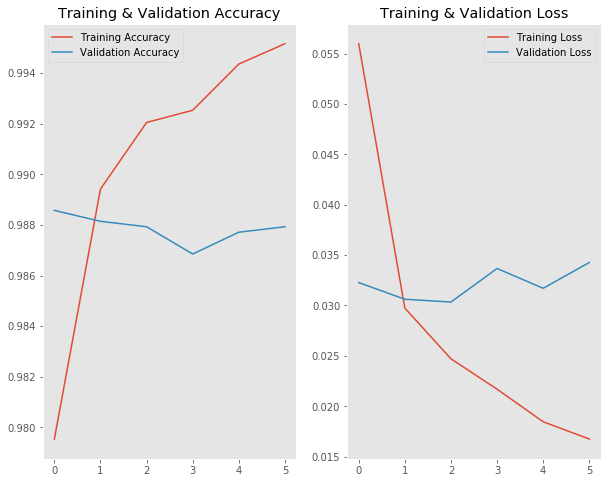

In [36]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Training & Validation Accuracy")
plt.plot(history_df.index, history_df['train_acc'], label="Training Accuracy")
plt.plot(history_df.index, history_df['val_accuracy'], label="Validation Accuracy")
plt.grid(False)
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Training & Validation Loss")
plt.plot(history_df.index, history_df['train_loss'], label="Training Loss")
plt.plot(history_df.index, history_df['val_loss'], label="Validation Loss")
plt.grid(False)
plt.legend()

plt.savefig('./foo.png')
plt.show()

#### Check the Predictions

In [37]:
class_labels = np.array(info.features['label'].names)
class_labels

array(['cat', 'dog'], dtype='<U3')

In [0]:
predicted_batch = model_1.predict(image_batch)

In [39]:
print(predicted_batch)
print(predicted_batch.shape)
print(tf.shape(tf.squeeze(predicted_batch)))

[[9.99973297e-01 2.66504794e-05]
 [1.00000000e+00 5.01078645e-08]
 [1.41247045e-02 9.85875309e-01]
 [2.33055835e-06 9.99997616e-01]
 [9.99999762e-01 2.43155426e-07]
 [1.26375854e-02 9.87362385e-01]
 [9.99987364e-01 1.25990009e-05]
 [2.65853858e-04 9.99734104e-01]
 [6.20153616e-04 9.99379873e-01]
 [3.03510716e-03 9.96964872e-01]
 [7.43829514e-05 9.99925613e-01]
 [8.93090473e-05 9.99910712e-01]
 [2.82290966e-05 9.99971747e-01]
 [2.93047742e-05 9.99970675e-01]
 [3.80149231e-06 9.99996185e-01]
 [1.15858558e-04 9.99884129e-01]
 [8.56407583e-01 1.43592402e-01]
 [1.13459297e-04 9.99886513e-01]
 [9.99993682e-01 6.31974945e-06]
 [4.59846749e-04 9.99540210e-01]
 [2.14880984e-02 9.78511870e-01]
 [7.39293173e-05 9.99926090e-01]
 [9.99999285e-01 6.91868991e-07]
 [9.99998212e-01 1.83039913e-06]
 [8.35151528e-04 9.99164820e-01]
 [2.49280693e-05 9.99975085e-01]
 [9.99993920e-01 6.05920695e-06]
 [9.99999642e-01 3.41586485e-07]
 [9.99910951e-01 8.90486481e-05]
 [2.35572384e-06 9.99997616e-01]
 [9.999350

In [40]:
predicted_ids = np.argmax(predicted_batch, axis=-1)
print(predicted_ids)
print(predicted_ids.shape)

[0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1]
(32,)


In [41]:
predicted_class_names = class_labels[predicted_ids]
print(predicted_class_names)

['cat' 'cat' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'dog' 'dog'
 'dog' 'dog' 'dog' 'dog' 'cat' 'dog' 'cat' 'dog' 'dog' 'dog' 'cat' 'cat'
 'dog' 'dog' 'cat' 'cat' 'cat' 'dog' 'cat' 'dog']


In [42]:
print(np.array(["Saif", "Sameer"])[np.array([0, 1, 1, 0, 1, 1, 0])])

['Saif' 'Sameer' 'Sameer' 'Saif' 'Sameer' 'Sameer' 'Saif']


In [43]:
print("True Labels      : {}".format(label_batch))
print("Predicted Labels : {}".format(predicted_ids))

True Labels      : [0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1]
Predicted Labels : [0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1]


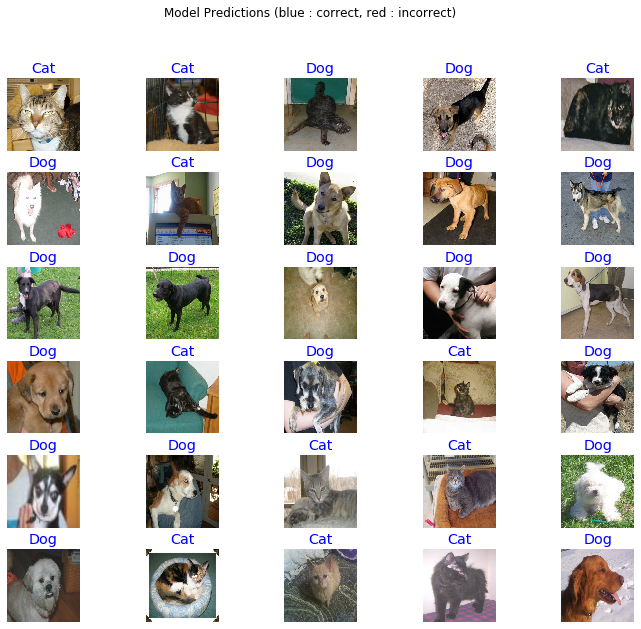

In [48]:
plt.figure(figsize=(12, 10))
plt.suptitle("Model Predictions (blue : correct, red : incorrect)")

for n in range(30):
  plt.subplot(6, 5, n+1)
  plt.subplots_adjust(hspace=0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
  plt.grid(False)

plt.show()